In [43]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2025-11-18 13:15:53--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-18 13:15:53--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-18 13:15:54--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

PCA(주성분 분석)를 이용해 이미지 데이터를 차원 축소하는 준비 과정

from sklearn.decomposition import PCA
→ PCA 모듈 불러오기

pca = PCA(n_components=50)
→ 주성분 50개로 데이터를 축소할 PCA 객체 생성

원래 100×100 = 10,000 차원 → 50차원으로 줄임

pca.fit(fruits_2d)
→ fruits_2d 데이터에 대해 PCA 학습

데이터 분산을 가장 잘 설명하는 50개의 주성분 계산

In [45]:
print(pca.components_.shape)

(50, 10000)


In [46]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs= plt.subplots(rows, cols, figsize=(cols*ratio,
                                              rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j<n:
        axs[i,j].imshow(arr[i*10 +j], cmap='gray_r')
        axs[i, j].axis('off')
  plt.show()

draw_fruits는 여러 이미지를 **격자 형태(10개씩)**로 시각화하는 함수

이미지 개수에 따라 행과 열을 자동 계산해 subplot을 만듬

각 칸에 이미지를 넣고 축을 제거하여 깔끔하게 표시

마지막에 plt.show()로 전체 이미지를 출력

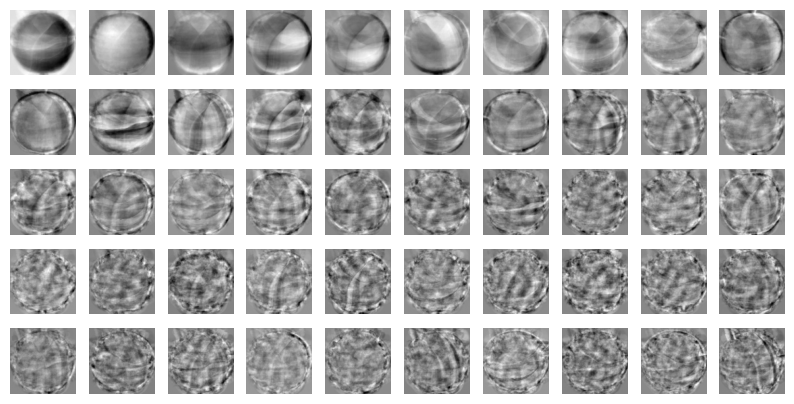

In [47]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

PCA로 얻은 주성분들을 100×100 이미지 형태로 바꿔 화면에 그리는 명령

In [48]:
print(fruits_2d.shape)

(300, 10000)


fruits_2d 배열의 형태(shape)**를 출력

300 : 이미지 개수

10000 : 각 이미지의 픽셀 수

100 × 100 이미지를 1차원으로 펼쳤기 때문에 10000

In [49]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


pca.transform(fruits_2d):
원본 10,000차원 이미지 데이터를 PCA 50차원으로 축소

fruits_pca:
차원 축소된 새로운 데이터

300 : 이미지 개수

50 : PCA로 줄인 새로운 특징 차원

In [50]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


fruits_pca:
PCA로 50차원으로 압축된 데이터 (shape: 300×50)

inverse_transform:
압축된 데이터를 다시 원래 차원(10000차원) 으로 복원
완전한 원본은 아니고, PCA 정보만으로 복원한 근사 이미지

print(fruits_inverse.shape):
복원된 데이터의 형태를 출력

300 : 이미지 개수

10000 : 복원된 이미지의 픽셀 수 (100×100)

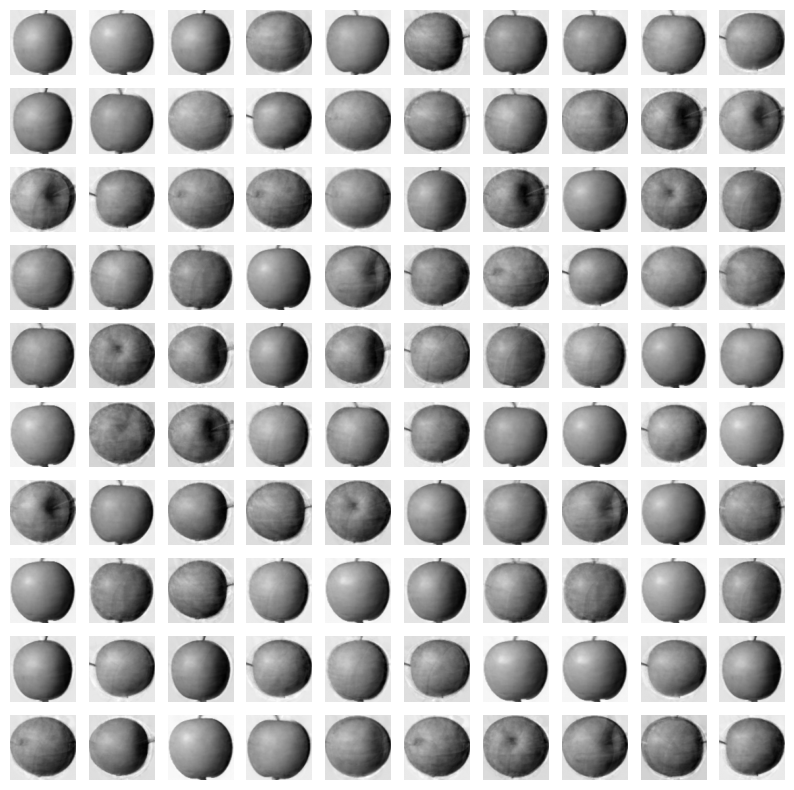

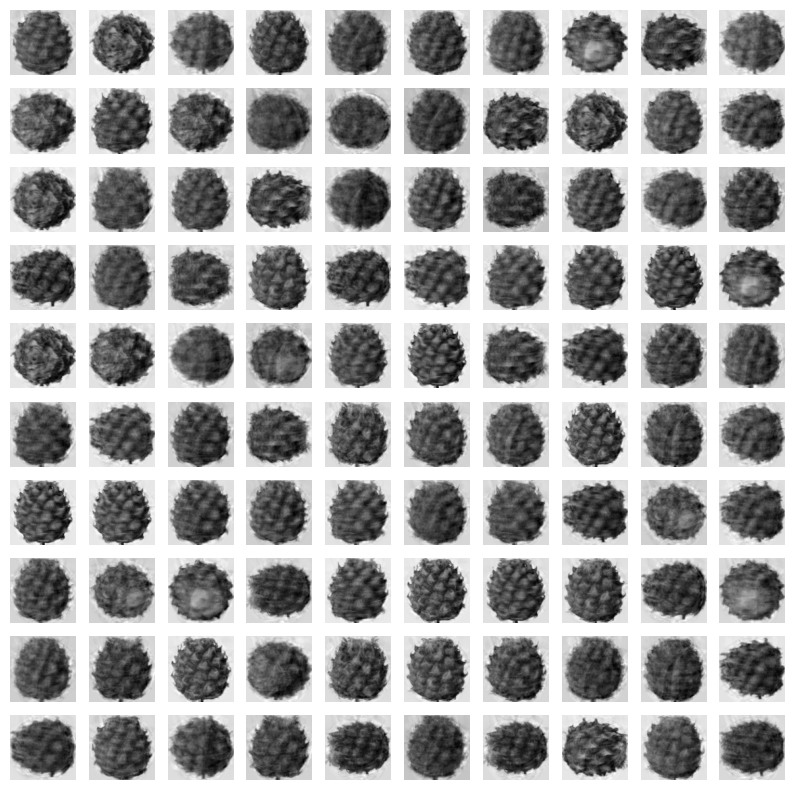

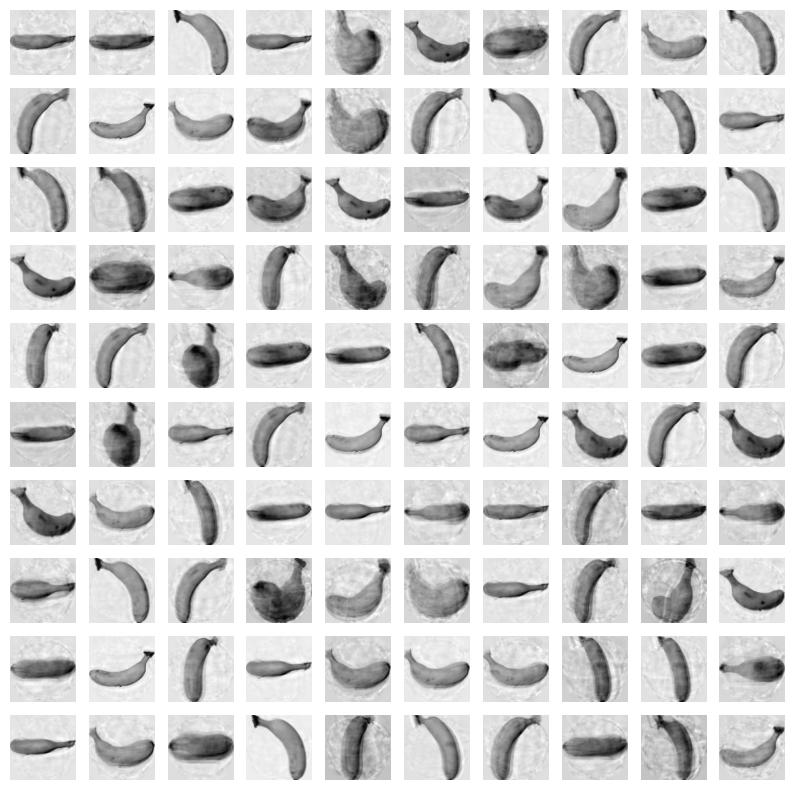

In [51]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

fruits_reconstruct = ... reshape(-1, 100, 100):
PCA로 복원된 300개의 데이터를
100×100 이미지 형태로 다시 바꾼것

for start in [0, 100, 200]:
0부터 시작
100부터 시작
200부터 시작
세 번 반복하겠다는 뜻

draw_fruits(fruits_reconstruct[start:start+100]):

각 구간에서 100장의 이미지를 출력합니다.

처음: 0~99 (사과)
다음: 100~199 (파인애플)
마지막: 200~299 (바나나)

print("\n"):

구간 사이에 빈 줄을 출력해서 화면을 구분하기 위한 것

In [52]:
print(np.sum(pca.explained_variance_ratio_))

0.9215250962294624


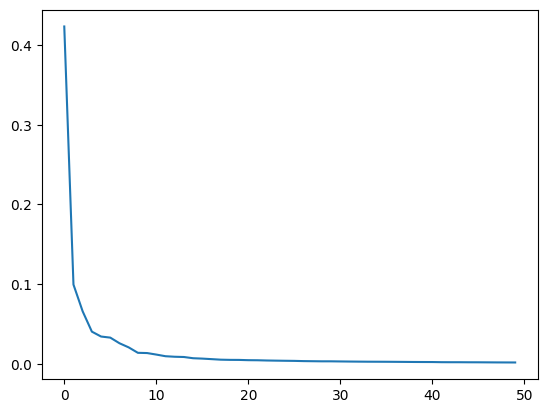

In [53]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

PCA 각 주성분이 전체 데이터에서 차지하는 정보 비율을 시각화한 그래프

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

이제 lr.fit(X_train, y_train)으로 학습하고, lr.predict(X_test)로 예측할 준비가 된 상태

In [55]:
target = np.array([0]*100 + [1]*100 + [2]*100)

300장 이미지 각각에 대응하는 클래스 레이블 배열을 만듬

In [56]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.1271670818328858


Logistic Regression이 PCA나 다른 전처리 없이 원본 100×100 이미지 데이터를 바로 분류했을 때 성능을 확인하는 간단한 평가 방법

In [57]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.016924095153808594


PCA로 차원 축소한 데이터를 이용해 로지스틱 회귀 모델을 평가하는 코드

In [58]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

PCA를 통해 정보(분산)의 절반만 유지하면서 차원 축소

fruits_2d 데이터를 기반으로 PCA 모델 학습


In [59]:
print(pca.n_components_)

2


PCA 학습 후 실제로 선택된 주성분(차원) 개수를 출력

In [60]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


pca.transform(fruits_2d):

학습된 PCA(pca)를 사용해 fruits_2d 데이터를 주성분 공간으로 변환

원래 2차원(혹은 feature 수)의 데이터를 PCA로 축소된 차원으로 바꿈

fruits_pca.shape:

변환된 데이터의 크기 확인

결과는 (샘플 수, 선택된 주성분 수) 형태

(300, 2) → 300개의 샘플, 2개의 주성분

In [61]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.04894137382507324


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

교차 검증 결과를 평균 내서 모델의 성능과 학습 시간을 확인

In [62]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


KMeans로 3개의 클러스터를 만들고 데이터를 분류한 뒤

km.labels_(각 데이터가 속한 클러스터 번호)를 가져와

클러스터 번호별 데이터 개수를 출력

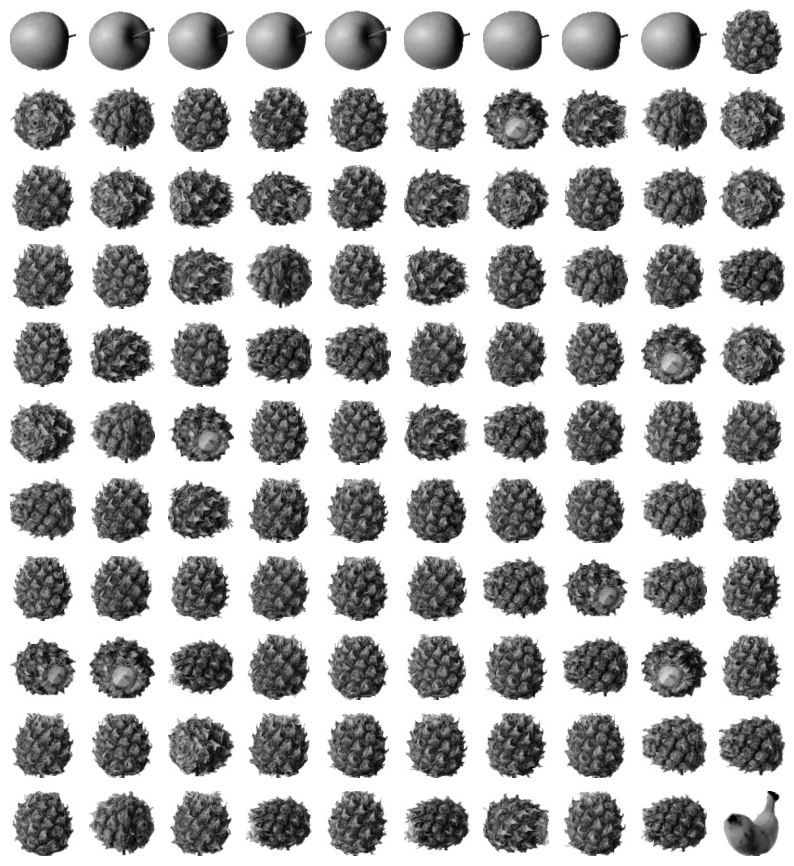

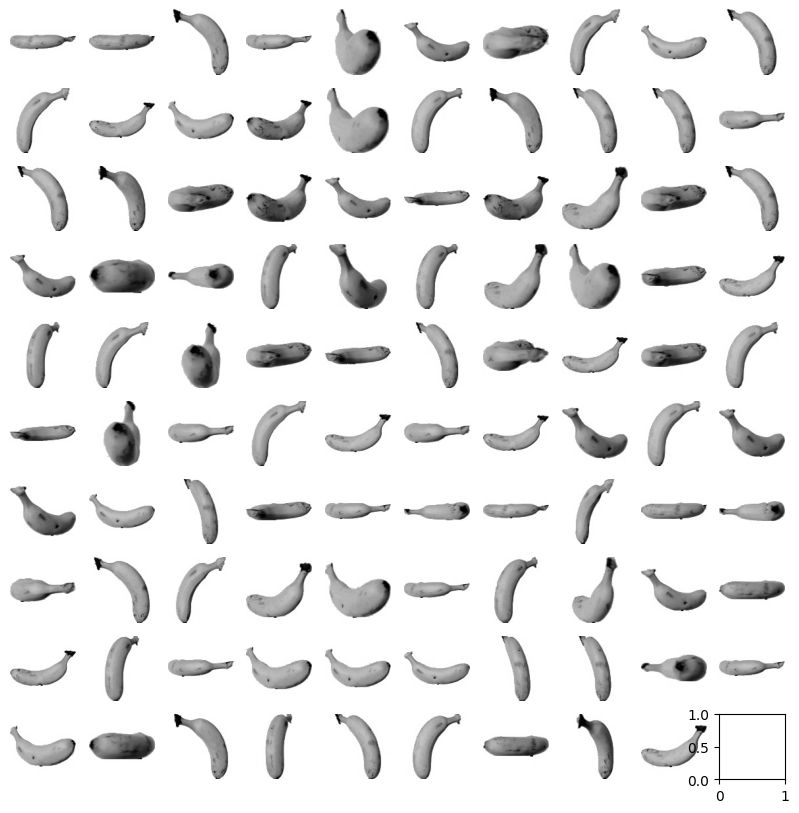

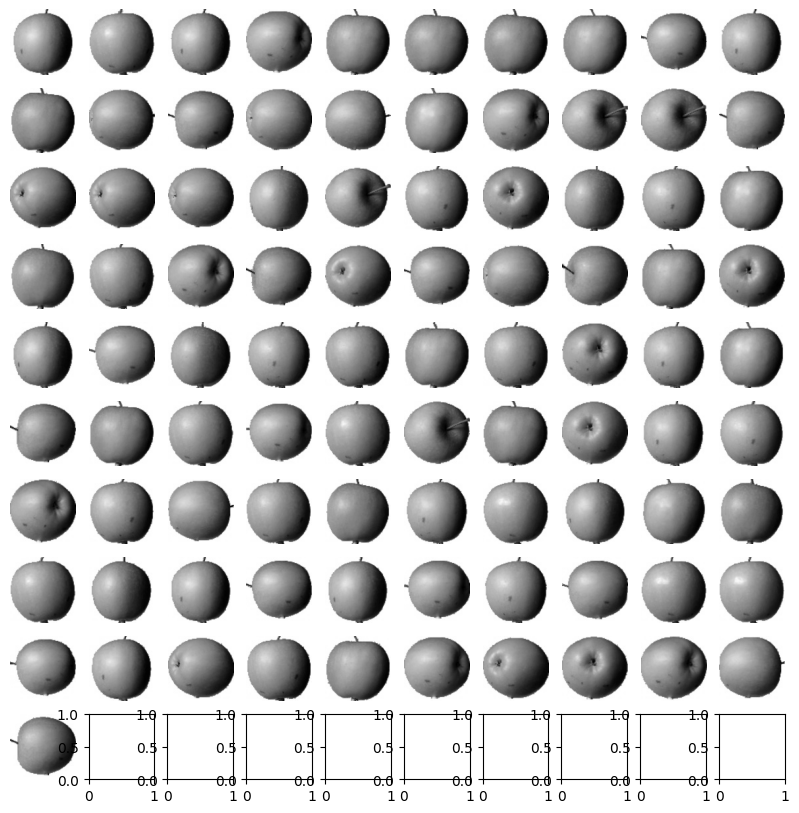

In [63]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")

클러스터 0, 1, 2에 속한 과일들만 골라서

draw_fruits()로 각 클러스터에 속한 이미지들을 시각화

print("\n")는 클러스터별 출력 사이에 줄바꿈을 넣어 구분

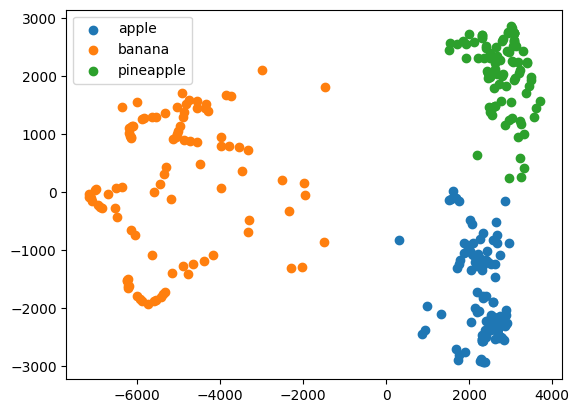

In [64]:
for label in range(0,3):
  data = fruits_pca[km.labels_== label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

클러스터 0, 1, 2에 속한 PCA 데이터들을 각각 다른 색으로 산점도 그린 후

범례를 apple, banana, pineapple으로 표시